In [7]:
# =========================
# League Points Prediction Pipeline
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [8]:
# --- 1. Load Data ---
df = pd.read_excel("League Winner & Total Points.xlsx")
print("Data loaded successfully. Shape:", df.shape)
print(df.head(), "\n")

Data loaded successfully. Shape: (180, 16)
    season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_total_points  \
0            45              67              -22                   42   
1            39              67              -28                   34   
2            49              35               14                   66   
3            59              53                6                   50   
4            59              55                4                   47   

   target_league_position  targ

In [9]:
# --- 2. Missing Values ---
print("Missing Values Before:")
print(df.isnull().sum())

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Filling:")
print(df.isnull().sum(), "\n")


Missing Values Before:
season                    0
team                      0
matches_played            0
wins                      0
draws                     0
losses                    0
points_per_game           0
goals_scored              0
goals_conceded            0
goal_difference           0
target_total_points       0
target_league_position    0
target_champion           0
target_top_4              0
target_top_6              0
target_relegated          0
dtype: int64

Missing Values After Filling:
season                    0
team                      0
matches_played            0
wins                      0
draws                     0
losses                    0
points_per_game           0
goals_scored              0
goals_conceded            0
goal_difference           0
target_total_points       0
target_league_position    0
target_champion           0
target_top_4              0
target_top_6              0
target_relegated          0
dtype: int64 



--- Outlier Check ---


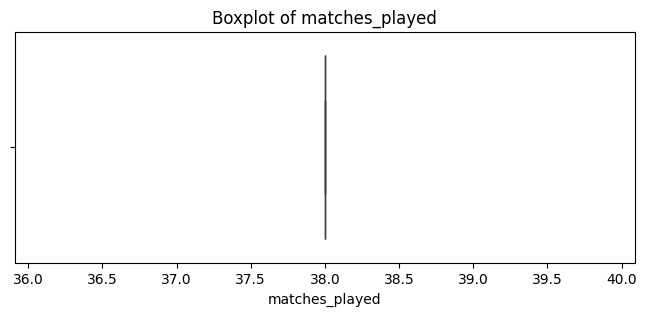

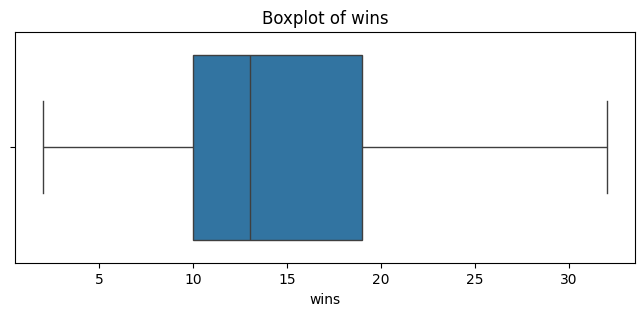

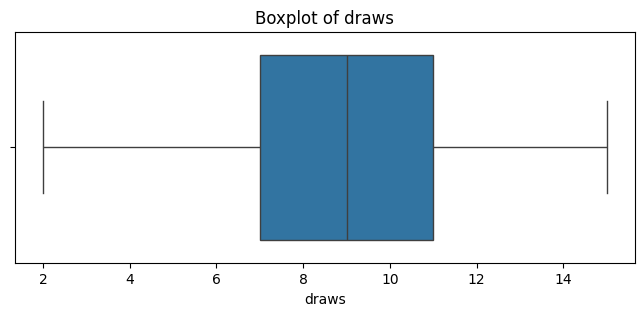

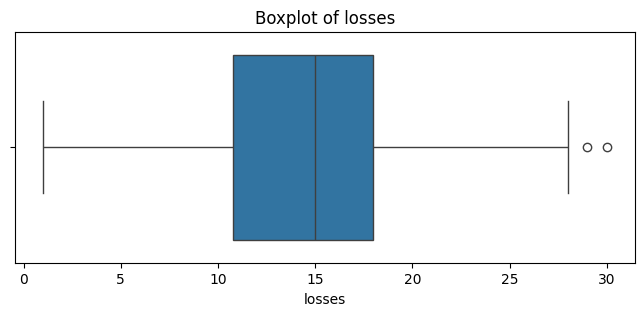

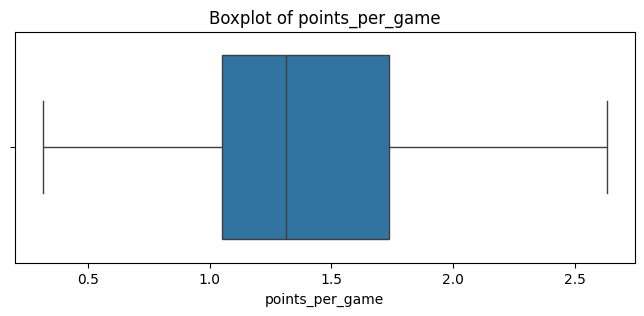

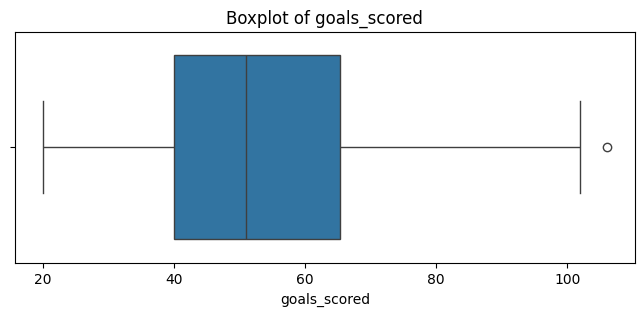

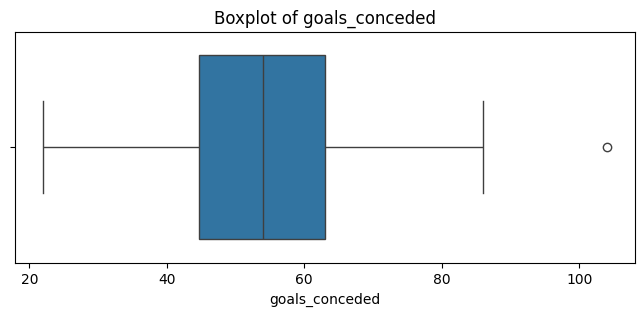

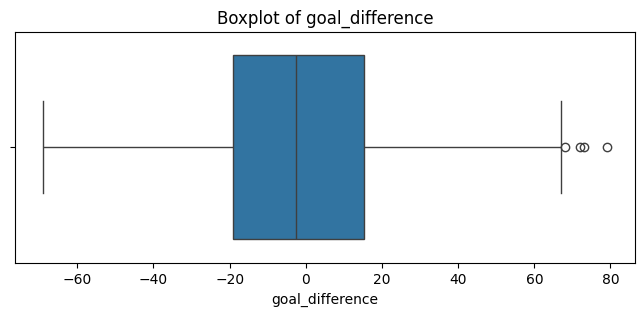

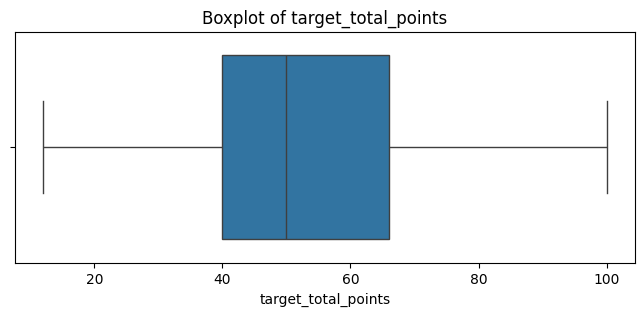

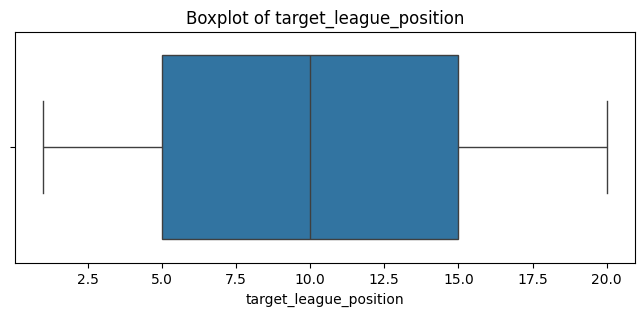

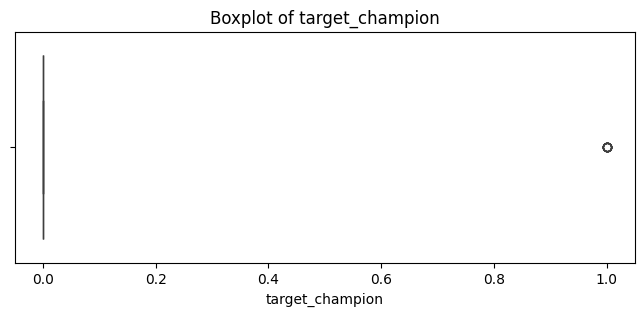

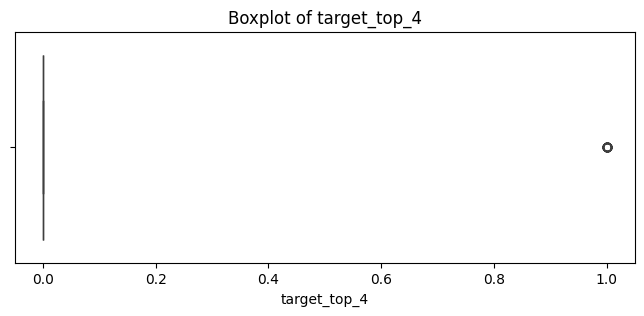

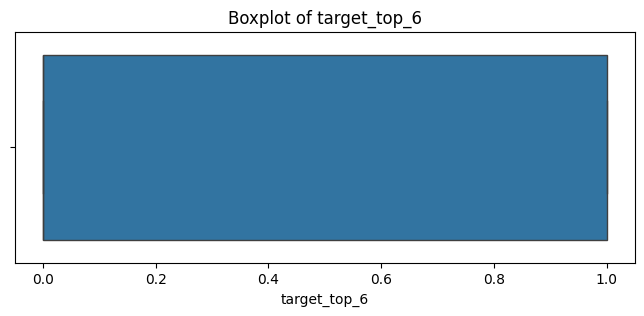

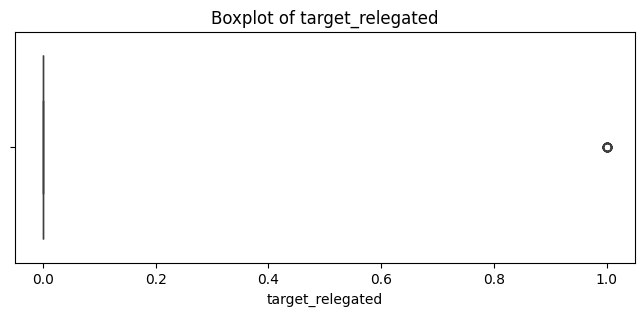

In [10]:

# --- 3. Outlier Check (Numeric Columns) ---
print("--- Outlier Check ---")
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [11]:
# --- 4. Feature Selection ---
# Target: 'target_total_points'
target = 'target_total_points'
y = df[target]

# Drop target and champion (result) from features
X = df.drop(columns=[target, 'target_champion'])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
print("Features after encoding. Shape:", X.shape, "\n")

Features after encoding. Shape: (180, 51) 



In [12]:
# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}\n")

Train shape: (144, 51), Test shape: (36, 51)



In [13]:
# --- 6. Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaling complete.\n")


Data scaling complete.



In [14]:
# --- 7. Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}\n")


--- Linear Regression Results ---
MAE: 0.00, RMSE: 0.00, R²: 1.00



In [15]:
# --- 8. Random Forest Regression ---
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)  # RF handles unscaled data
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Regression Results ---")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}\n")


--- Random Forest Regression Results ---
MAE: 0.66, RMSE: 1.44, R²: 0.99



In [16]:

# --- 9. XGBoost Regression ---
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # XGB handles unscaled data
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("--- XGBoost Regression Results ---")
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}\n")


--- XGBoost Regression Results ---
MAE: 0.31, RMSE: 0.83, R²: 1.00



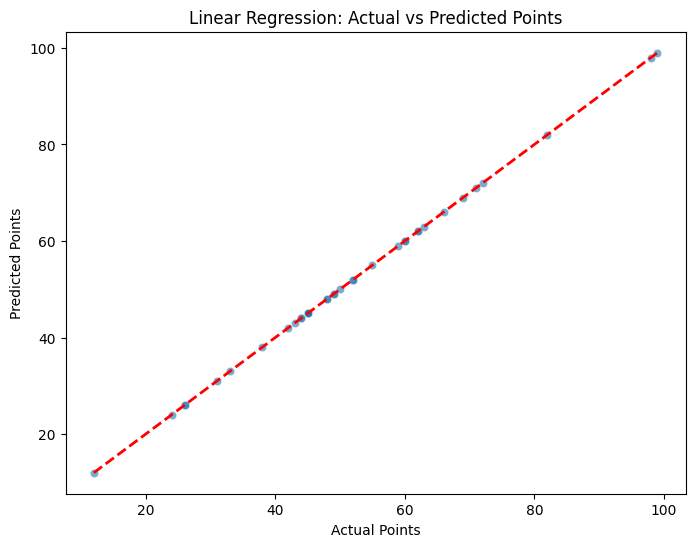

In [17]:


# --- 10. Visual Evaluation (Linear Regression Example) ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Linear Regression: Actual vs Predicted Points")
plt.show()